In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [3]:
import pandas as pd

dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

print("Descriptive Statistics for the raw data:")
print(dataframe_raw.describe())
print(dataframe_raw.info())

print("\nDescriptive Statistics for the rolling standard deviation data:")
print(dataframe_stdev.describe())
print(dataframe_stdev.info())

Descriptive Statistics for the raw data:
       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203   

In [ ]:
Raw data varies more overall vs stdev data which is expected. 

<Figure size 1200x600 with 0 Axes>

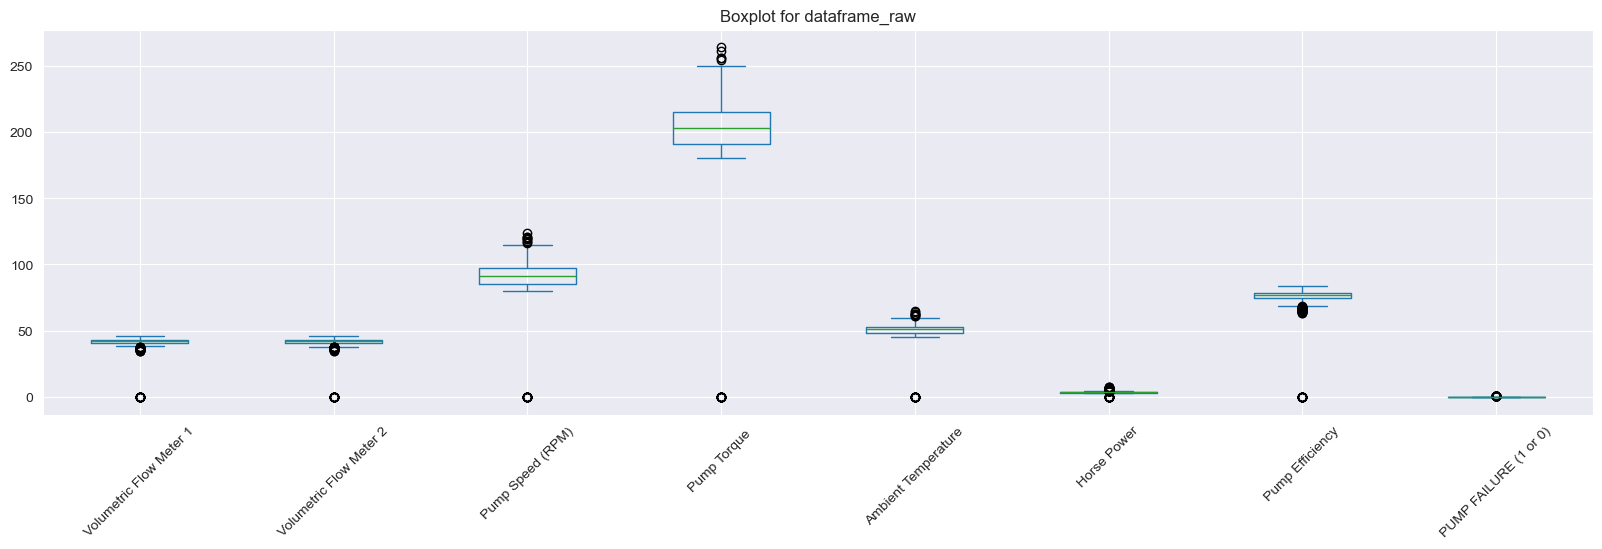

<Figure size 1200x600 with 0 Axes>

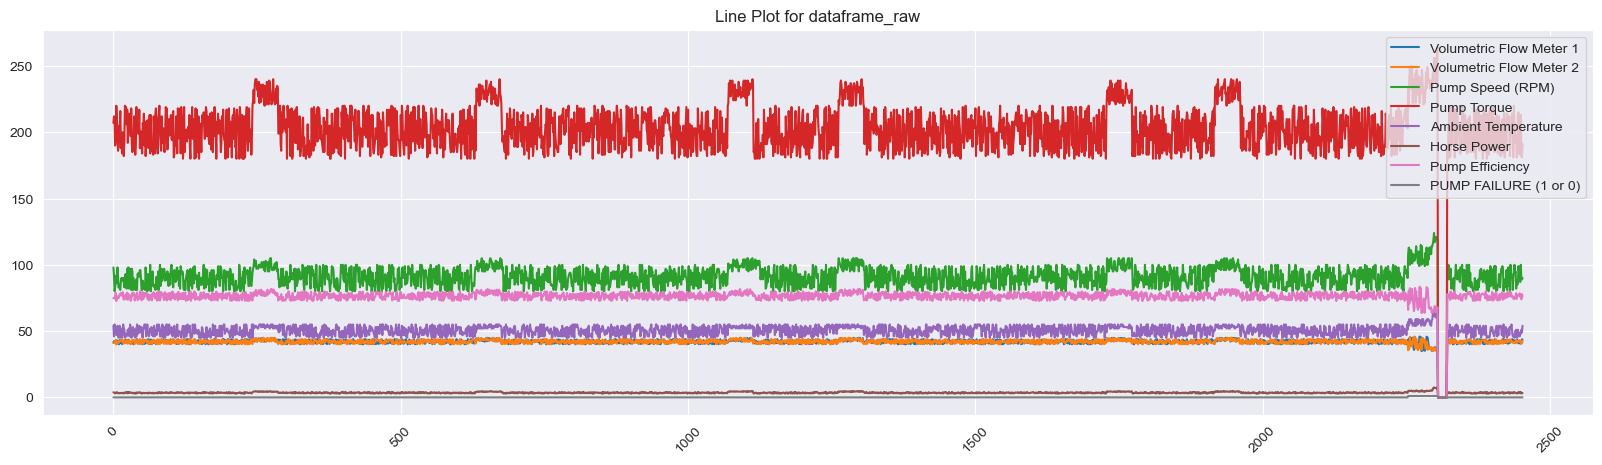

<Figure size 1200x600 with 0 Axes>

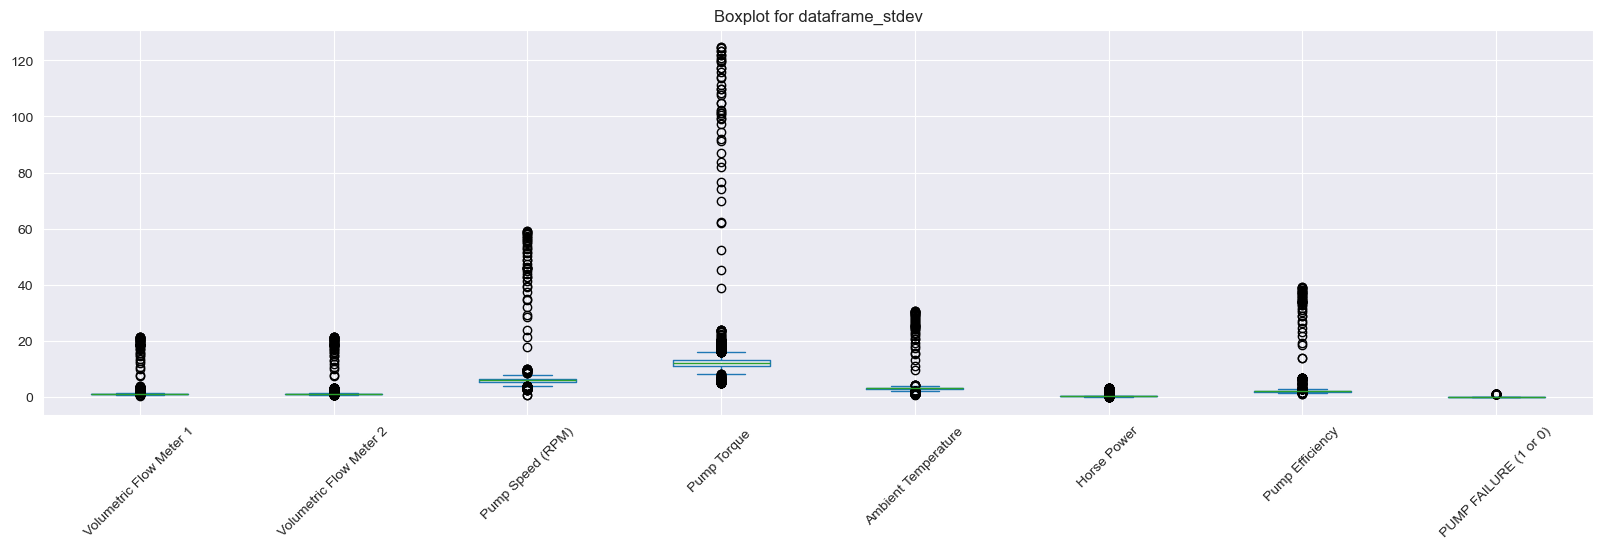

<Figure size 1200x600 with 0 Axes>

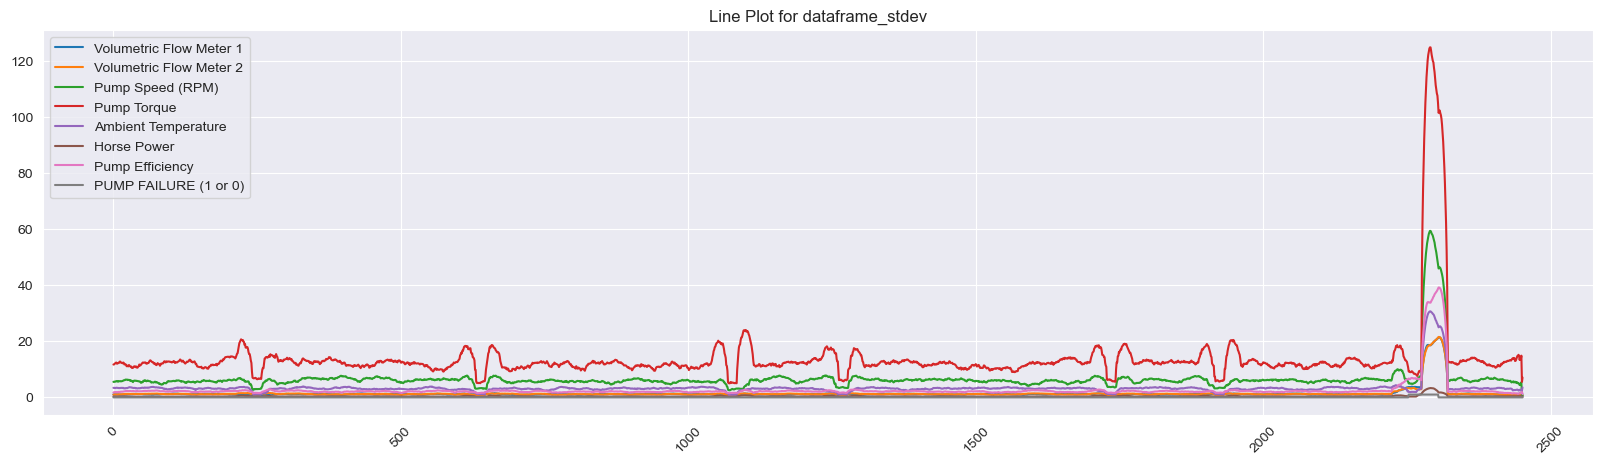

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

plt.figure(figsize=(12, 6)) 
dataframe_raw.plot(kind='box') 
plt.title('Boxplot for dataframe_raw')
plt.xticks(rotation=45) 
plt.show() 

plt.figure(figsize=(12, 6))
dataframe_raw.plot(kind='line')
plt.title('Line Plot for dataframe_raw') 
plt.xticks(rotation=45) 
plt.show() 

plt.figure(figsize=(12, 6))
dataframe_stdev.plot(kind='box') 
plt.title('Boxplot for dataframe_stdev') 
plt.xticks(rotation=45) 
plt.show() 

plt.figure(figsize=(12, 6)) 
dataframe_stdev.plot(kind='line') 
plt.title('Line Plot for dataframe_stdev') 
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1200x600 with 0 Axes>

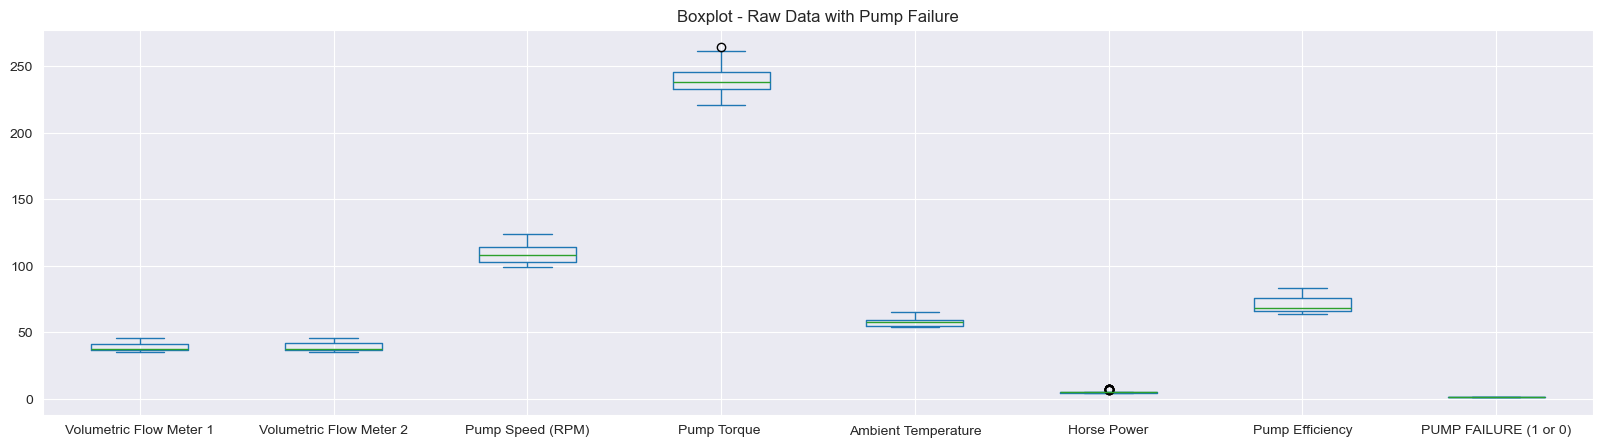

<Figure size 1200x600 with 0 Axes>

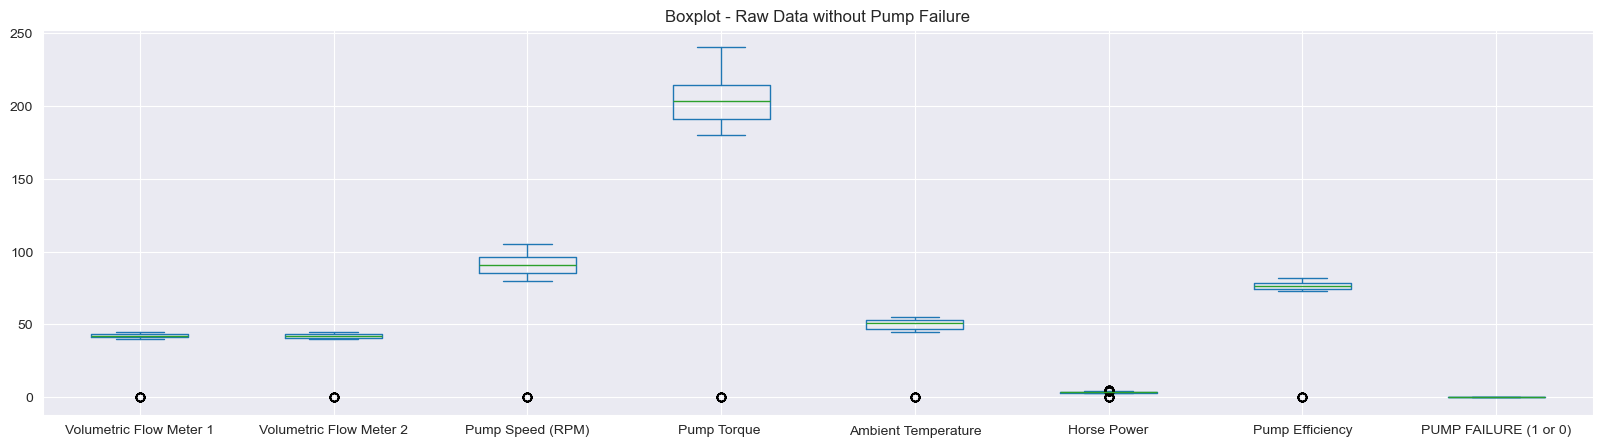

<Figure size 1200x600 with 0 Axes>

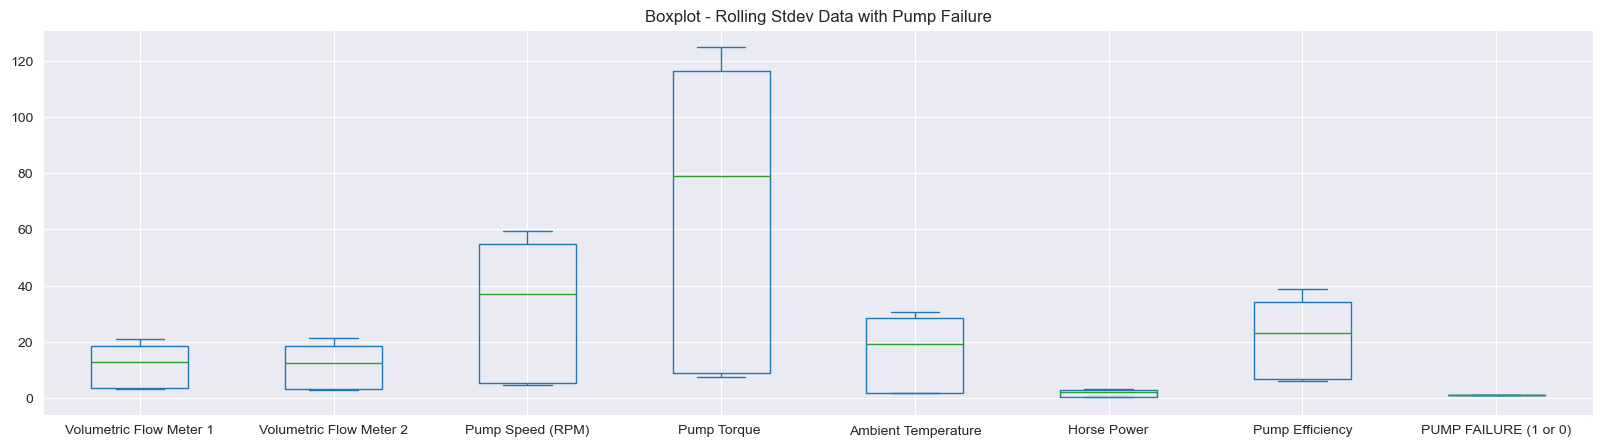

<Figure size 1200x600 with 0 Axes>

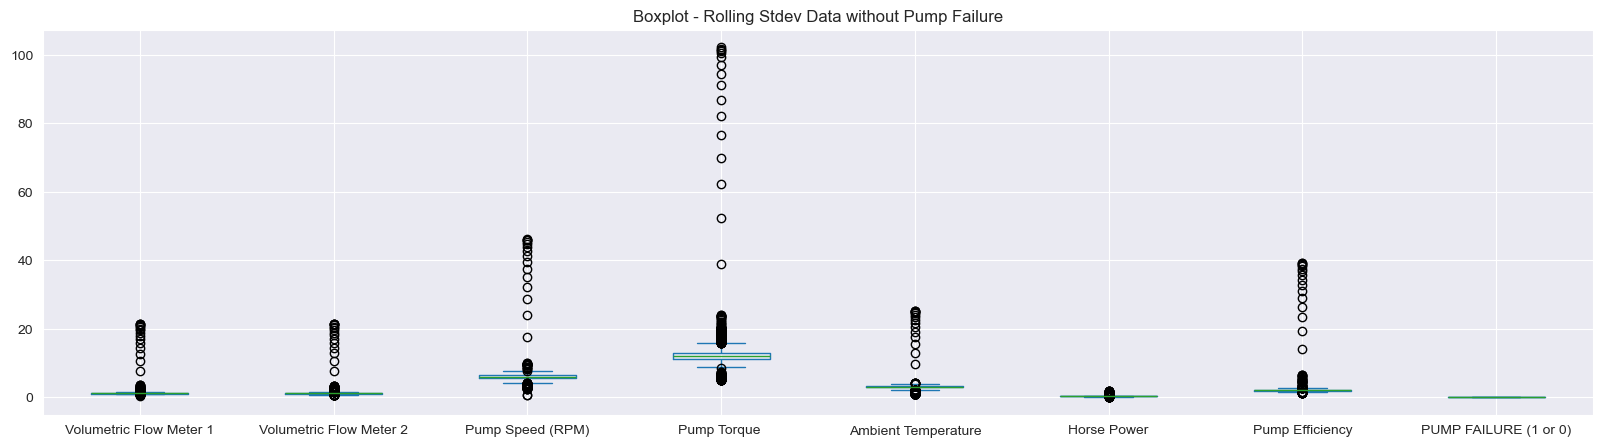

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe_raw_failure = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 1]
dataframe_raw_normal = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 0]

dataframe_stdev_failure = dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1]
dataframe_stdev_normal = dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)'] == 0]

plt.figure(figsize=(12, 6))
dataframe_raw_failure.plot(kind='box', title='Boxplot - Raw Data with Pump Failure')
plt.show()

plt.figure(figsize=(12, 6))
dataframe_raw_normal.plot(kind='box', title='Boxplot - Raw Data without Pump Failure')
plt.show()

plt.figure(figsize=(12, 6))
dataframe_stdev_failure.plot(kind='box', title='Boxplot - Rolling Stdev Data with Pump Failure')
plt.show()

plt.figure(figsize=(12, 6))
dataframe_stdev_normal.plot(kind='box', title='Boxplot - Rolling Stdev Data without Pump Failure')
plt.show()


In [40]:
import pandas as pd

df = pd.DataFrame({
    "Volumetric Flow Meter 1": [1,2,3,4,5],
    "Volumetric Flow Meter 2": [1,2,3,4,5],
    "Pump Speed (RPM)": [1,2,3,4,5],
    "Pump Torque": [1,2,3,4,5],
    "Ambient Temperature":[1,2,3,4,5],
    "Horse Power": [1,2,3,4,5],
    "Pump Efficiency":[1,2,3,4,5],
    "PUMP FAILURE(1 or 0)": [1,2,3,4,5]
})

Q1 = DF_Raw_Data.quantile(0.25, numeric_only=True)
Q3 = DF_Raw_Data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1


print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)


Q1 (25th percentile): Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64
Q3 (75th percentile): Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64
Interquartile Range (IQR): Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [39]:
import pandas as pd

DF_Raw_Data = pd.read_csv('DF_Raw_Data.csv')

Q1 = DF_Raw_Data.quantile(0.25, numeric_only=True)
Q3 = DF_Raw_Data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Outliers = DF_Raw_Data[(DF_Raw_Data.lt(Lower_Limit)) | (DF_Raw_Data.gt(Upper_Limit))]

number_of_outliers = Outliers.any(axis=1).sum()

total_data_points = DF_Raw_Data.shape[0]

print(f"Lower Limit for Outliers: {Lower_Limit}")
print(f"Upper Limit for Outliers: {Upper_Limit}")
print(f"Number of Outliers: {number_of_outliers}")


Lower Limit for Outliers: Volumetric Flow Meter 1     37.915
Volumetric Flow Meter 2     37.805
Pump Speed (RPM)            67.000
Pump Torque                155.000
Ambient Temperature         40.500
Horse Power                  2.380
Pump Efficiency             68.695
PUMP FAILURE (1 or 0)        0.000
dtype: float64
Upper Limit for Outliers: Volumetric Flow Meter 1     46.275
Volumetric Flow Meter 2     46.325
Pump Speed (RPM)           115.000
Pump Torque                251.000
Ambient Temperature         60.500
Horse Power                  4.620
Pump Efficiency             84.335
PUMP FAILURE (1 or 0)        0.000
dtype: float64
Number of Outliers: 79


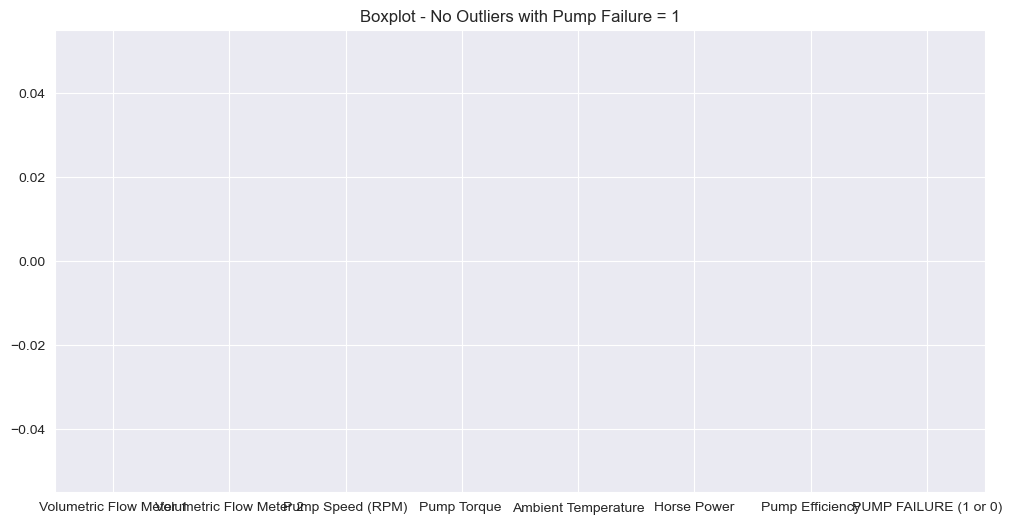

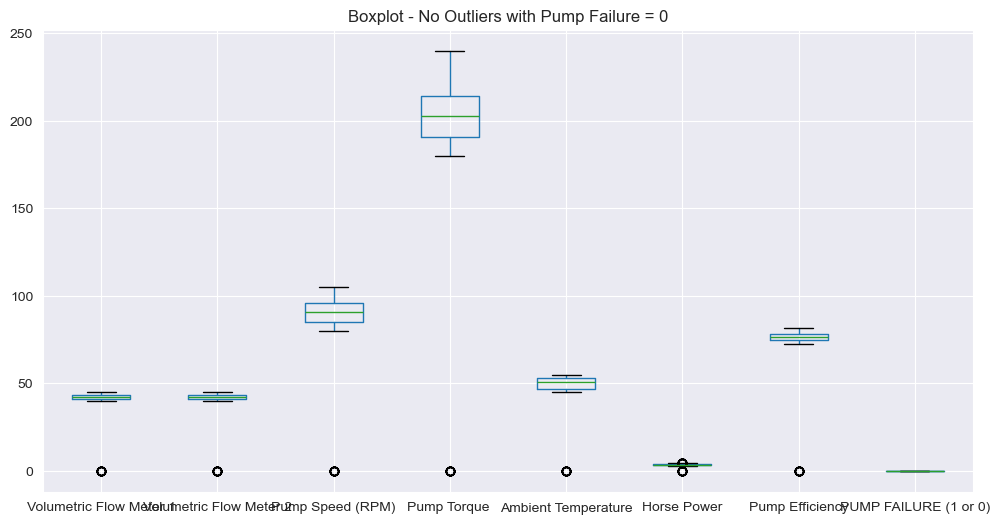

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

no_outliers = DF_Raw_Data[~Outliers.any(axis=1)]

plt.figure(figsize=(12, 6))
plt.title('Boxplot - No Outliers with Pump Failure = 1')
no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1].boxplot()
plt.show()

plt.figure(figsize=(12, 6))
plt.title('Boxplot - No Outliers with Pump Failure = 0')
no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0].boxplot()
plt.show()
